In [21]:
#Data Cleaning
#************************************************************#

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sales_df=pd.read_excel('F:/From dish E/DA/python/CASE STUDY/Online Retail.xlsx',sheet_name='Online Retail')

In [23]:
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
sales_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [25]:
# rename the column
sales_df.rename(columns={'InvoiceDate': 'InvoiceTime'}, inplace= True)

In [26]:
#delete the duplicated number
#If the value of all fields in two records are same,we define it as a duplicated value and only keep one of them.
rows_before = sales_df.shape[0]
sales_df.drop_duplicates(inplace= True)
rows_after = sales_df.shape[0]
print(rows_before,rows_after)

541909 536641


In [27]:
#reset the index
sales_df.reset_index(drop=True,inplace=True)
# view the null value
# The column 'Desctiptive' stores decription of products,we don't need to process them
sales_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceTime         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [28]:
sales_df[sales_df.isnull().values==True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country
605,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
605,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1409,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom


In [29]:
#check whether there is customer with ID '0'
#Since there is no customer whose 'CustomerID' is 0, we use 0 to fill all null values in the 'CustomerId' column.
sales_df[sales_df['CustomerID']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country


In [30]:
sales_df['CustomerID'].fillna(0, inplace=True)
sales_df['Description'].fillna(0, inplace=True)
(sales_df['CustomerID']==0).sum()

135037

In [31]:
#unification process of time
sales_df['InvoiceTime']=pd.to_datetime(sales_df['InvoiceTime'],errors='coerce')
sales_df['Date']=pd.to_datetime(sales_df['InvoiceTime'].dt.date,errors='coerce') #invalid parsing---set as NaN
sales_df['Month']=sales_df['Date'].dt.month

In [32]:
# variable type transformation
sales_df['Quantity']=sales_df['Quantity'].astype('int32')
sales_df['UnitPrice']=sales_df['UnitPrice'].astype('float')
sales_df['CustomerID']=sales_df['CustomerID'].astype('int32')

In [33]:
#calculate the sum price for each record, add a new column
sales_df['SumPrice']=sales_df['Quantity']*sales_df['UnitPrice']

In [34]:
# outlier processing
sales_df.describe()

,Quantity,UnitPrice,CustomerID,Month,SumPrice
count,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,11435.904653,7.544820,18.123861
std,219.130156,97.233118,6795.044250,3.508696,380.656263
min,-80995.000000,-11062.060000,0.000000,1.000000,-168469.600000
25%,1.000000,1.250000,0.000000,5.000000,3.750000
50%,3.000000,2.080000,14336.000000,8.000000,9.870000
75%,10.000000,4.130000,16241.000000,11.000000,17.400000
max,80995.000000,38970.000000,18287.000000,12.000000,168469.600000


In [35]:
query_a=sales_df['InvoiceNo'].str.contains('A')==True
sales_df.loc[query_a,:]
sales_df.drop(sales_df['InvoiceNo'].str.contains('A')==True,inplace=True)

In [36]:
#Negative values occur in column 'Quantity''UnitPrice''SumPrice'
#The causes of this situation is some of these orders have been cancelled or set as 0 (may because of promotions)
#Orders start with C : cancelled order
#Orders with total price 0: free order 
#Orders start with A: from the description we find these order are used to adjust bad debt, filter them.

In [37]:
sales_df[(sales_df['Quantity']<=0|(sales_df['UnitPrice']<0))].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,2010-12-01,12,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010-12-01,12,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,12,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,12,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,12,-6.96


In [38]:
#recoginze orders that have been cancelled
query_c = sales_df['InvoiceNo'].str.contains('C')==True
sales_cancel = sales_df.loc[query_c,:].copy()
sales_success = sales_df.loc[-query_c,:].copy()

In [39]:
#find whether cancelled orders and successful orders have intersections
sales_cancel['SrcInvoiceNo']=sales_cancel['InvoiceNo'].str.split('C',expand=True)[1]
pd.merge(sales_cancel,sales_success,left_on='SrcInvoiceNo',right_on='InvoiceNo')

,InvoiceNo_x,StockCode_x,Description_x,Quantity_x,InvoiceTime_x,UnitPrice_x,CustomerID_x,Country_x,Date_x,Month_x,...,StockCode_y,Description_y,Quantity_y,InvoiceTime_y,UnitPrice_y,CustomerID_y,Country_y,Date_y,Month_y,SumPrice_y


In [40]:
print('orders that have been cancelled:',sales_cancel.shape,'other orders:',sales_success.shape)
sales_success.describe()
sales_success=sales_success[-(sales_success['Quantity']<=0|(sales_success['UnitPrice']<0))]
sales_success.describe()
query_free=sales_success['UnitPrice'] == 0
sales_success=sales_success.loc[-query_free,:]
#drop the cancelled&free orders and orders which quantity or unitprice is minus zero

orders that has been cancelled: (9251, 12) other orders: (527388, 11)


In [41]:
sales_success.describe() #data cleaning part is end here

,Quantity,UnitPrice,CustomerID,Month,SumPrice
count,524876.000000,524876.000000,524876.000000,524876.00000,524876.000000
mean,10.616618,3.922576,11437.707731,7.55222,20.275408
std,156.280328,36.093096,6799.515061,3.50816,271.694084
min,1.000000,0.001000,0.000000,1.00000,0.001000
25%,1.000000,1.250000,0.000000,5.00000,3.900000
50%,4.000000,2.080000,14350.000000,8.00000,9.920000
75%,11.000000,4.130000,16245.000000,11.00000,17.700000
max,80995.000000,13541.330000,18287.000000,12.00000,168469.600000


In [42]:
#Descriptive statistics analysis
#************************************************************#

In [43]:
#1.From the perspective of orders:

#Group all data by 'InvoiceNo' and calculate the sum of Quantity and SumPrice
invoice_grouped=sales_success.groupby('InvoiceNo')[['Quantity','SumPrice']].sum()
invoice_grouped.head()
#get the per order transaction and associated purchase rate by executing describe()
invoice_grouped.describe()

,Quantity,SumPrice
count,19960.000000,19960.000000
mean,279.178758,533.170098
std,955.011964,1780.412701
min,1.000000,0.380000
25%,69.000000,151.695000
50%,150.000000,303.300000
75%,296.000000,493.462500
max,80995.000000,168469.600000


In [44]:
'''
During the 1 yr statistical period, we have 19960 effective 
orders, per order transaction is £533.17, associated purchase
rate is around 279. It indicates that the dominating business 
of this e-commerce website is wholesale.
The mean of 'SumPrice' and 'Quantity' are larger than their
median, and the average SumPrice even exceeds the Q3 value. 
Thus, the overall difference among all orders 
were apparent, and some customers with super-strong 
purchasing power existed.
'''

"During the 1 yr statistical period , we have 19960 effective \norders,per order transaction is £533.17, associated purchase\nrate is 279. It indicates that the dominated business \nof this e-commerence website may be wholesale.\nThe mean of 'SumPrice' and 'Quantity' are larger than their\nmedian, and the average SumPrice if even larger than its Q3 \nvalue, thus,we can conclude that the overall difference among \nall orders are obvious,and some customers with super-strong \npurchasing power exist.\n"

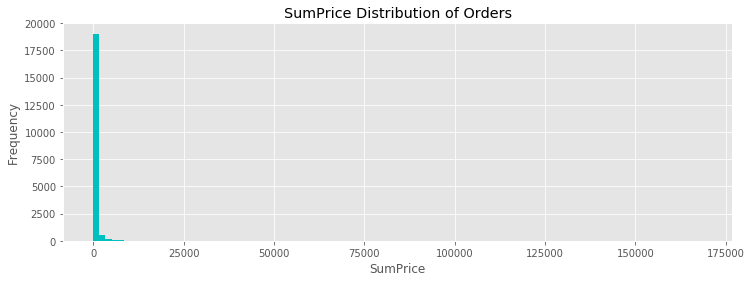

In [45]:
#draw a histogram named 'SumPrice Distribution of orders'
invoice_grouped['SumPrice'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('SumPrice Distribution of Orders')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')
plt.show()

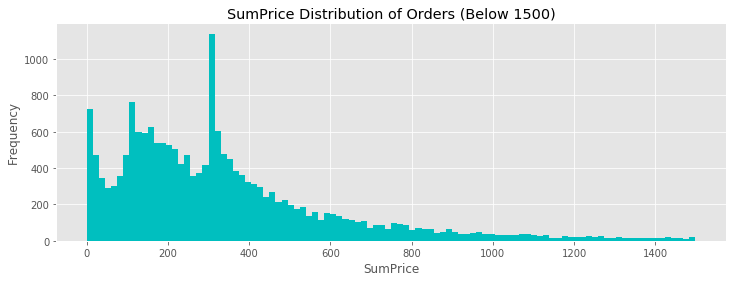

In [121]:
#some SumPrice data is too big to provide a good visualization
#effect, here we filter orders with SumPrice over 1500
invoice_grouped[invoice_grouped.SumPrice < 1500]['SumPrice'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('SumPrice Distribution of Orders (Below 1500)')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')
plt.show()

In [47]:
'''
the SumPrice of orders concentrate within £400, and we have 
three peak values occur within the following periods: 
within £20, £100~230, £300~320, and the highest is in  £300~320

 * This is a point for further exploration.
'''

'\nthe SumPrice of orders concentrate within £400, and we have \nthree peak values occurred within the following periods: \nwithin £20, £100~230, £300~320, and the highest is in  £300~320\n\n * This is a point for further exploration.\n'

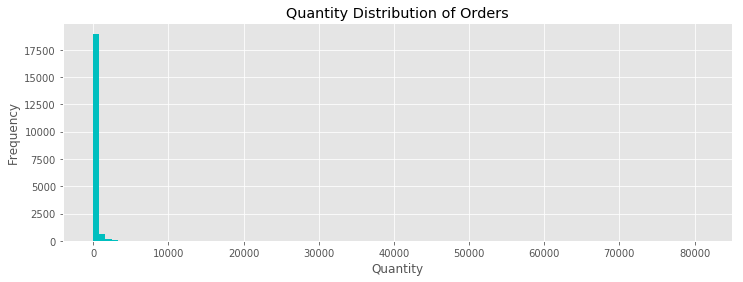

In [48]:
#draw a histogram named 'Quantity distribution of Orders'
invoice_grouped['Quantity'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('Quantity Distribution of Orders')
plt.ylabel('Frequency')
plt.xlabel('Quantity')
plt.show()

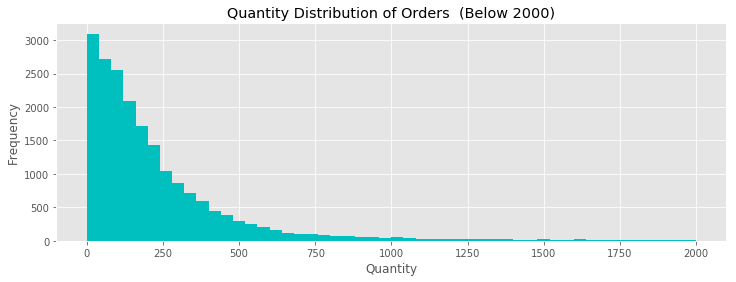

In [49]:
#some outliers make the quantity range too wide and affect
#the visualization effect, here we filter orders with quantity over 2000
invoice_grouped[invoice_grouped.Quantity < 2000]['Quantity'].hist(bins = 50, figsize = (12, 4), color = 'c')
plt.title('Quantity Distribution of Orders (Below 2000)')
plt.ylabel('Frequency')
plt.xlabel('Quantity')
plt.show()

In [50]:
'''
The shape of the distrbution of goods quantities shows a 
long-tail dustribution, most orders had the their goods 
quantities within 250, the more the per-order goods quantity was,
the less the number of orders was.
'''

'\nThe shape of the distrbution of goods quantities shows a \nlong-tail dustribution, most orders have the their goods \nquantities within 250, the more the per-order goods quantity is,\nthe less the order amount is.\n'

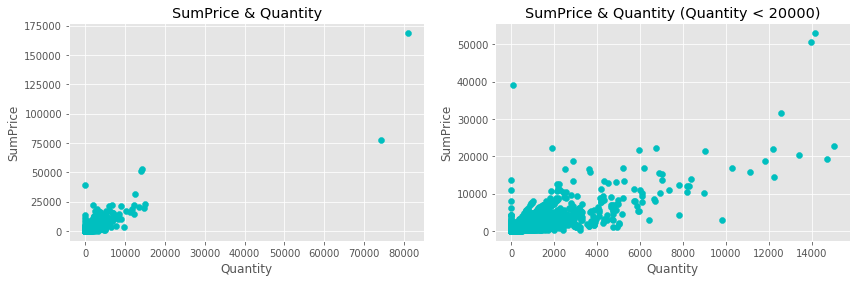

In [51]:
#Draw a scatter plot to find the relationship between SumPrice
#and order quantity.
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(invoice_grouped['Quantity'], invoice_grouped['SumPrice'], color = 'c')
plt.title('SumPrice & Quantity')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')

plt.subplot(122)
plt.scatter(invoice_grouped[invoice_grouped.Quantity < 20000]['Quantity'], invoice_grouped[invoice_grouped.Quantity < 20000]['SumPrice'], color = 'c')
plt.title('SumPrice & Quantity (Quantity < 20000)')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')
plt.show()

In [52]:
'''
In general,the variable SumPrice has a positive correlation with
Quantity. However,there are some outliers(high sumprice and low 
quantity).  * This is a point for further exploration.
'''

'\nIn general,the variable SumPrice has a positive correlation with\nQuantity. However,there is some outlier(high sumprice and low \nquantity).  * This is a point for further exploration.\n'

In [53]:
#2.From the perspective of customers:

#Here we only analyse customers with customer ID(not 0)
sales_customer=sales_success[sales_success.CustomerID!=0].copy()
#group all data by customer and InvoiceNo first
customer_grouped=sales_customer.groupby(['CustomerID','InvoiceNo'])[['Quantity','SumPrice']].sum().reset_index()
customer_grouped.head()

,CustomerID,InvoiceNo,Quantity,SumPrice
0,12346,541431,74215,77183.60
1,12347,537626,319,711.79
2,12347,542237,315,475.39
3,12347,549222,483,636.25
4,12347,556201,196,382.52


In [54]:
#group all data by customer again
customer_grouped = customer_grouped.groupby('CustomerID').agg({'InvoiceNo':np.size,'Quantity':np.sum,'SumPrice':np.sum})
customer_grouped.head()

,InvoiceNo,Quantity,SumPrice
CustomerID,,,
12346,1,74215,77183.60
12347,7,2458,4310.00
12348,4,2341,1797.24
12349,1,631,1757.55
12350,1,197,334.40


In [55]:
customer_grouped.describe()

,InvoiceNo,Quantity,SumPrice
count,4338.000000,4338.000000,4338.000000
mean,4.272015,1187.641770,2048.679865
std,7.697998,5043.619358,8985.227179
min,1.000000,1.000000,3.750000
25%,1.000000,159.000000,306.482500
50%,2.000000,378.000000,668.570000
75%,5.000000,989.750000,1660.597500
max,209.000000,196915.000000,280206.020000


In [56]:
'''
The mean value for per customer order amount is 4; the median
is 2; also, over 25% customer only placed their order once and didn't
retain. The per customer order amount is 1187, exceeds the Q3 
value, the customer purchased most bought 196915 products in total. 
The per customer transaction is £2049, exceeds the Q3 value as well. 
These indicate there occurred noticeable purchasing power differences among 
all customers.Customers with high expenditure make the mean value high.
'''

"\nThe mean value for per customer order amount is 4, the median\nis 2,also, over 25% customer only placed order once and didn't\nretain. The per customer order amount is 1187, exceeds the Q3 \nvalue, the customer purchased most bought 196915 products in \ntotal. The per customer transaction is £2049, exceeds the Q3 \nvalue as well. This indicates there occurs obvious purchasing \npower differences among all customers, some customers with \nhigh expenditure make the mean value high.\n"

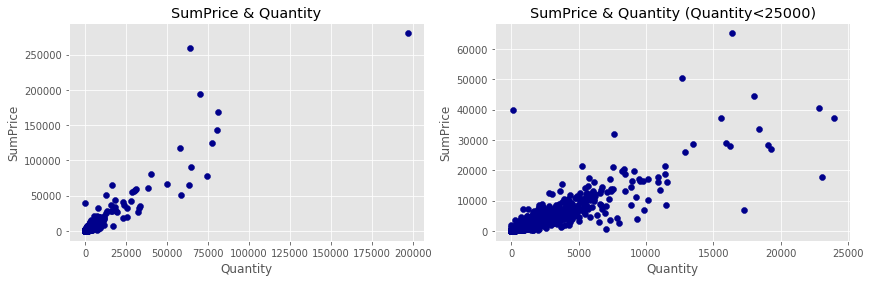

In [57]:
#draw a scatter diagram with the data related to SumPrice and Quantity(grouped by customer)
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(customer_grouped['Quantity'], customer_grouped['SumPrice'], color = 'darkblue')
plt.title('SumPrice & Quantity')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')

plt.subplot(122)
plt.scatter(customer_grouped[customer_grouped.Quantity < 25000]['Quantity'], customer_grouped[customer_grouped.Quantity < 25000]['SumPrice'], color = 'darkblue')
plt.title('SumPrice & Quantity (Quantity<25000)')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')
plt.show()

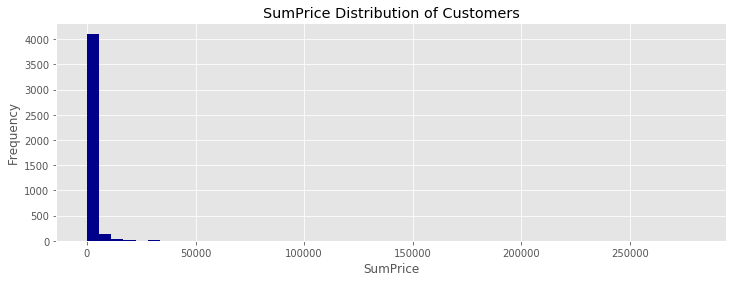

In [58]:
customer_grouped.SumPrice.hist(bins = 50, figsize = (12, 4), color = 'darkblue')
plt.title('SumPrice Distribution (group by customers)')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')
plt.show()

In [59]:
'''
From the histogram, we find most of the customers didn't have
strong purchasing power. If we focus on SumPrice Distribution 
of Customers with order SumPrice below 5000, we get a single
peak long-tail distribution graph. The peak value locates in 
the period (£83,£333)
'''

"\nFrom the histogram we can find most of the customers don't have\nstrong purchasing power.If we focus on SumPrice Distribution \nof Customers with order SumPrice below 5000, we get a single\npeak long tail distribution graph. The peak value locates in \nthe period (£83,£333)\n"

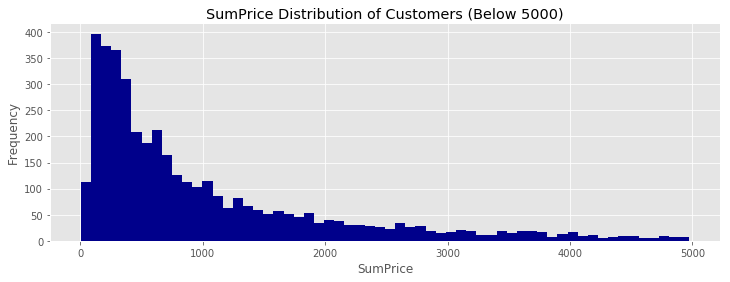

In [60]:
customer_grouped[customer_grouped.SumPrice < 5000].SumPrice.hist(bins = 60, figsize = (12, 4), color = 'darkblue')
plt.title('SumPrice Distribution (group by customers) (Below 5000)')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')
plt.show()

In [61]:
#From the perspective of products:

#Unit price for some products fluctuates.
#example:
sales_success[sales_success['StockCode'] == '85123A'][['UnitPrice','Date']]
#sales_success.loc[sales_success['StockCode'] == '85123A',['UnitPrice','Date']]
sales_success.loc[sales_success['StockCode'] == '85123A',:].UnitPrice.value_counts()

2.95    1702
2.55     358
5.79     157
5.91      25
3.20       5
3.24       4
2.40       1
Name: UnitPrice, dtype: int64

In [62]:
'''
Price of one specific product can be various in different 
months, thus, we calculate the mean cost of each product.
(we group the products by using the stock code, calculate 
the total sales and total sold amount, and use total sales
/total number of units). 
'''

'\nPrice of one specific product can be various in different \nmonth, thus, we calculate the mean price of each product.\n(we group the products by using the stock code, calculate \nthe total sales and total sold amount, and use total sales\n/total number of units). \n'

In [63]:
goods_grouped = sales_success.groupby('StockCode')[['Quantity', 'SumPrice']].sum()
goods_grouped['AvgPrice'] = goods_grouped['SumPrice'] / goods_grouped['Quantity']
goods_grouped.head()

,Quantity,SumPrice,AvgPrice
StockCode,,,
10002,860,759.89,0.883593
10080,303,119.09,0.393036
10120,192,40.32,0.210000
10125,1295,993.99,0.767560
10133,2856,1539.60,0.539076


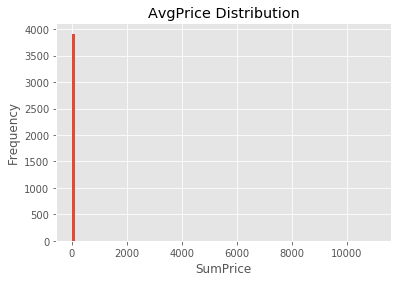

In [64]:
goods_grouped.AvgPrice.hist(bins=100)
plt.title('AvgPrice Distribution')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')
plt.show()

In [65]:
#The price of most products is less than £100. Here we filter the outlier.

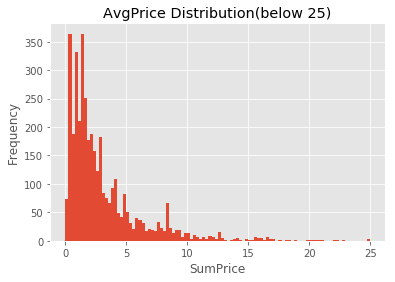

In [66]:
goods_grouped[goods_grouped.AvgPrice<25]['AvgPrice'].hist(bins=100)
plt.title('AvgPrice Distribution(below 25)')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')
plt.show()

In [67]:
'''
The peak value of products unit price is £1-2, A few products had
their unit price higher than £10. Thus, the value proposition
of this e-commerce website was focusing on the wholesale of 
small commodities with low unit price.
'''

'\nThe peak value of products unit price is £1-2， products with\nunit price higher than £10 are rare. Thus, the value proposition\nof this e-commerce website is focusing on the wholesale of \nsmallware with low unit price.\n'

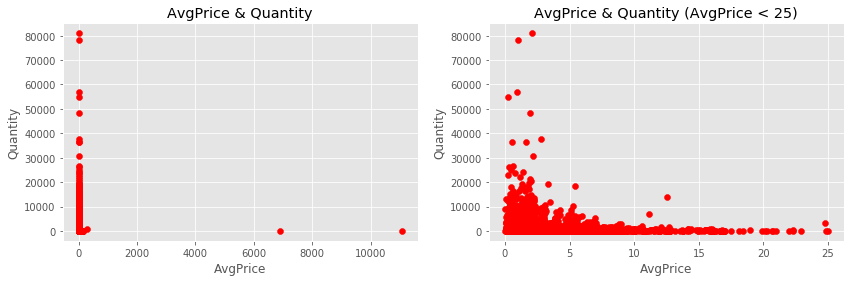

In [68]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(goods_grouped['AvgPrice'], goods_grouped['Quantity'], color = 'r')
plt.title('AvgPrice & Quantity')
plt.ylabel('Quantity')
plt.xlabel('AvgPrice')

plt.subplot(122)
plt.scatter(goods_grouped[goods_grouped.AvgPrice < 25]['AvgPrice'],goods_grouped[goods_grouped.AvgPrice < 25]['Quantity'], color = 'r')
plt.title('AvgPrice & Quantity (AvgPrice < 25)')
plt.ylabel('Quantity')
plt.xlabel('AvgPrice')
plt.show()

In [69]:
'''
From the sales quantity, we find products
with price lower than £5 got the customer's preference. 
'''

"From the sales quantity we cand find products with price lower\nthan £5 get customer's preference.\n"

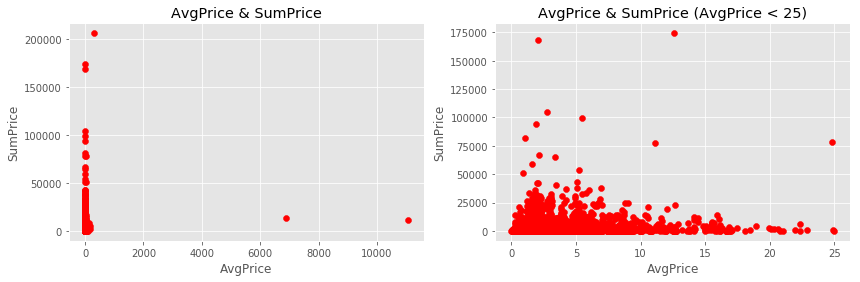

In [70]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(goods_grouped['AvgPrice'], goods_grouped['SumPrice'], color = 'r')
plt.title('AvgPrice & SumPrice')
plt.ylabel('SumPrice')
plt.xlabel('AvgPrice')

plt.subplot(122)
plt.scatter(goods_grouped[goods_grouped.AvgPrice < 25]['AvgPrice'], goods_grouped[goods_grouped.AvgPrice < 25]['SumPrice'], color = 'r')
plt.title('AvgPrice & SumPrice (AvgPrice < 25)')
plt.ylabel('SumPrice')
plt.xlabel('AvgPrice')
plt.show()

In [71]:
'''
Products with a low unit price also contributed to high SumPrice. 
This kind of commodities became the leading source of the total sales.
Although some goods had a high unit price, the high unit price didn't 
result in high sales. Here we suggest the purchasing department select 
more low price products to enlarge product types in low price area.
'''

"\nProducts with low price also contribute to high SumPrice. This\nkind of products becomes the leading source of the total sales.\nHowever, although some goods have high unit price, high unit \nprice doesn't result in high sales. \nHere we suggest the purchasing department select more low price \nproducts to enlarge product types in low price area.\n"

In [72]:
#From the perspective of time:

In [73]:
time_grouped = sales_success.groupby('InvoiceNo').agg({'Date': np.min, 'Month': np.min, 'Quantity': np.sum, 'SumPrice': np.sum}).reset_index()

In [74]:
time_grouped.head()

,InvoiceNo,Date,Month,Quantity,SumPrice
0,536365,2010-12-01,12,28,103.48
1,536366,2010-12-01,12,12,22.20
2,536367,2010-12-01,12,83,278.73
3,536368,2010-12-01,12,15,70.05
4,536369,2010-12-01,12,3,17.85


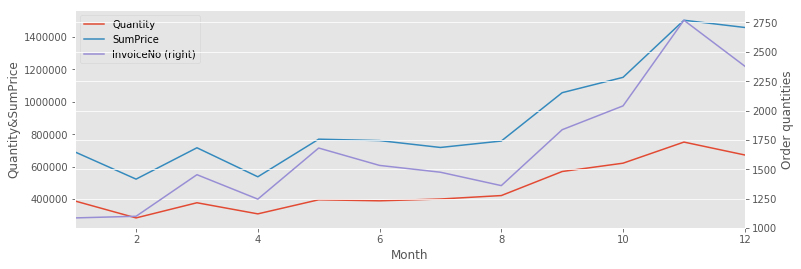

In [75]:
month=time_grouped.groupby('Month').agg({'Quantity':np.sum,'SumPrice':np.sum,'InvoiceNo':np.size})
month_plot=month.plot(secondary_y='InvoiceNo',x_compat=True,figsize=(12,4))
month_plot.set_ylabel('Quantity&SumPrice')
month_plot.right_ax.set_ylabel('Order quantities')
plt.show()

In [76]:
'''
We draw the plot with double axes on a monthly basis to show the 
wholesales,sales volume, and order amount per month. One point to 
mention here is that we only have data for 9 days in December and 
that's why we see a 'decrease' in December which goes against the 
general trend.All three plots have similar trends.The sales 
conditions remained stable relatively from January to August. And then 
kept growing between September and November. Consider the dominating 
business of this e-commerce platform was selling gifts, the sales would 
be affected obviously by holidays, such as Halloween, Thanks Giving Day, 
Black Friday and Boxing day.
'''

"\nWe draw the plot with double axes on monthly basis to show the whole sales,\nsales volume and order amount per month. \nOne point to mention here is that  we only have data for 9\ndays in December and thats why we see a 'decrease' in December\nwhich againsts the general trend.\nAll three plots have similar trend. The sales conditions remains\nstable relatively from January to August.And then keeps growing \nbetween September and November. Consider the dominate business \nof this e-commerce platform is gift, the sales would be affected\nobviously by holidays, such as Halloween, Thanks Giving Day,BlacK\nFriday and Boxing day.\n"

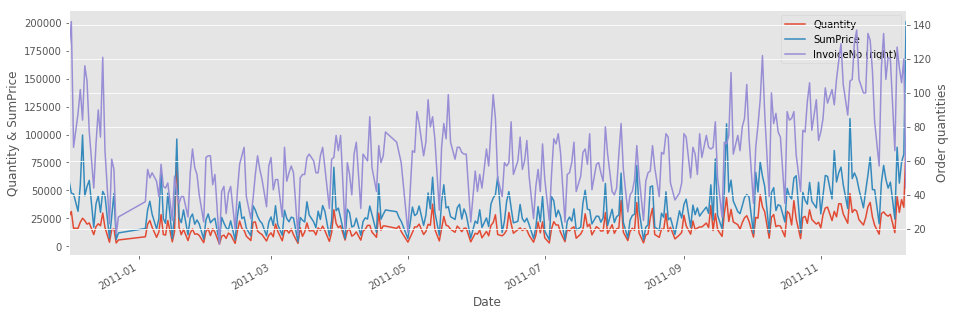

In [77]:
day=time_grouped.groupby('Date').agg({'Quantity':np.sum,'SumPrice':np.sum,'InvoiceNo':np.size}).plot(secondary_y='InvoiceNo',x_compat=True,figsize=(15,5))
day.set_ylabel('Quantity & SumPrice')
day.right_ax.set_ylabel('Order quantities')
plt.show()

In [78]:
'''
We draw the plot with double axes daily to show the sales, sales 
volume, and order amount per day. As we analyzed before, Quantity 
and SumPrice show similar trends.Here we see a surge in sales in 
the last month. We draw a graph of this period separately.

'''

'\nWe draw the plot with double axes on daily basis to show the \nwhole sales,sales volume and order amount per day. As we analyzed\nbefore, Quantity and SumPrice show similar trend.Here we see a \nsurge of sales in the last month. We draw graph of this period\nseparately.\n'

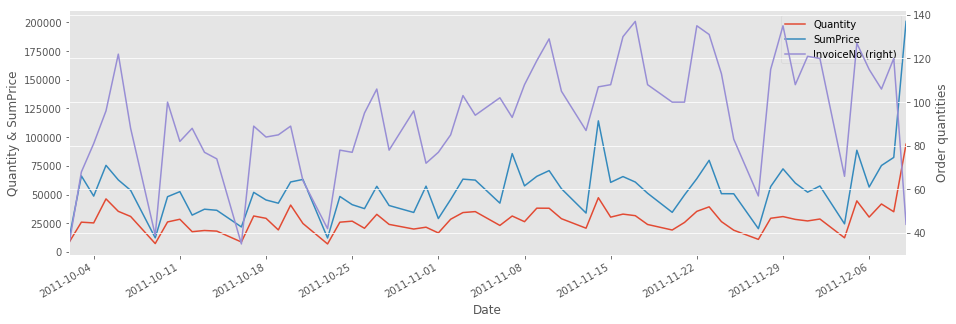

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice
535160,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,2011-12-09,12,168469.60
536279,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,0,United Kingdom,2011-12-09,12,1714.17
535647,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,0,United Kingdom,2011-12-09,12,933.17
535164,581485,20749,ASSORTED COLOUR MINI CASES,84,2011-12-09 09:38:00,6.35,17389,United Kingdom,2011-12-09,12,533.40
536434,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,2011-12-09,12,469.44


In [79]:
#for the convience to get time period,set time as index
time_grouped=time_grouped.set_index('Date')
day_part=time_grouped['2011-10-01':'2011-12-09'].groupby('Date').agg({'Quantity': np.sum, 'SumPrice': np.sum, 'InvoiceNo': np.size}).plot(secondary_y = 'InvoiceNo', x_compat=True,figsize = (15, 5))
day_part.set_ylabel('Quantity & SumPrice')
day_part.right_ax.set_ylabel('Order quantities')
plt.show()

sales_success[sales_success.Date=='2011-12-09'].sort_values(by='SumPrice',ascending=False).head()

In [80]:
'''
On 9th, Dec, there was an apparent decrease in order quantity,
however, we get the highest sales in this sampling interval, that
indicates there should be some orders with large goods quantity
on that day.
After browsing the sales data, a customer from the UK bought 80000+
paper craft on 9th, Dec, caused the sales surge. It's better for 
the e-commerce platform to pay more attention to this high-value
customer by taking actions like setting fixed customer service 
staff to this client.
'''

"\nOn 9th,Dec, there is an apparent decrease in order quantity,\nhowever, we get the highest sales in this sample interval, that\nindicates there should be some order with large goods quantity\non that day.\nAfter browsing the sales data, a customer from UK bought 80000+\npaper craft on 9th,Dec, caused the sales surge. It's better for \nthe e-commerce platform to pay more attention to this high-value\ncustomer by taking actions like setting fixed customer service \nstaff to this client.\n"

In [82]:
#from the perspective of zones:

#To find the congruent relationship between Customer and Country
sales_country=sales_customer[['CustomerID','Country']].drop_duplicates(subset=['CustomerID','Country'])
#calcuate sum price on the basis of customer ID
country_grouped = sales_customer.groupby('CustomerID')[['SumPrice']].sum().reset_index()
#use square brackets to make it a dataframe
#merge 2 tables
country_grouped = country_grouped.merge(sales_country, on='CustomerID')
country_grouped=country_grouped.groupby('Country').agg({'SumPrice':np.sum,'CustomerID':np.size})
#build a new field to calculate average amount
country_grouped['AvgAmount']=country_grouped['SumPrice']/country_grouped['CustomerID']
country_grouped.sort_values(by='SumPrice',ascending=False)
#country_grouped.plot.bar()
#plt.show()

,SumPrice,CustomerID,AvgAmount
Country,,,
United Kingdom,7284989.004,3920,1858.415562
Netherlands,285446.340,9,31716.260000
EIRE,265262.460,3,88420.820000
Germany,228678.400,94,2432.748936
France,208934.310,87,2401.543793
Australia,139843.950,9,15538.216667
Spain,66470.260,30,2215.675333
Switzerland,57222.850,21,2724.897619
Belgium,47971.210,25,1918.848400


In [83]:
'''
It seems that most of the customers were still from the 
The UK and the primary source of overseas income was mostly 
from the neighboring countries of the United Kingdom. This 
phenomenon might relate to logistic costs and language factors, 
or it might because the influence of this e-commerce platform 
was attenuated gradually by distance. 
We can try to increase the overseas popularity by launching 
more advertisements. At the same time, add more language choices 
for the website. And also, provide more transparent and convenient 
solutions for decreasing the overseas logistics costs and 
optimizing logistic procedures.
'''

'\nIt can be seen that most of the customers are still from the \nUK, and the main source of overseas income is mostly from the\nneighboring countries of the United Kingdom. This phenomenon \nmay be related to logistic costs and language factors, or it \nmay because the influence of this e-commerce platform is \nattenuated gradually by distance. \nWe can try to increase the overseas popularity by launching \nmore advertisements. At the same time, add more language choices \nfor the website. And also, provide more clear and convenient \nsolutions for decreasing the overseas logistics costs and \noptimizing logistic procedures.\n'

In [85]:
#Analysis of customer behaviors:

#Customer life circle
# the earlist purchase time
mindate = sales_customer.groupby('CustomerID')[['Date']].min()
# the last purchase time间
maxdate = sales_customer.groupby('CustomerID')[['Date']].max()

In [86]:
mindate.Date.value_counts().head(10)

2010-12-01    95
2010-12-02    93
2010-12-08    83
2010-12-06    70
2010-12-05    69
2010-12-09    67
2010-12-16    58
2010-12-07    50
2010-12-03    46
2010-12-15    42
Name: Date, dtype: int64

In [87]:
maxdate.Date.value_counts().head(10)

2011-12-08    103
2011-12-06     94
2011-12-05     94
2011-12-07     90
2011-12-01     79
2011-11-29     77
2011-11-22     74
2011-12-02     72
2011-11-30     71
2011-11-17     64
Name: Date, dtype: int64

In [88]:
'''
Since we only have data for the one-year period, we don't know their
buying actions before/after this period. Real-life cycles for
some of them would be longer, and this brings limitations to 
our analysis.
The date of initial consumptions occurred frequently at the beginning 
of the statistical period, and the date of last consumptions occurred 
mostly at the end of the statistical period. That means the actual 
life cycle of a large number of users must be longer.
'''

"\nSince we only have data for one-year period, we don't know their\nbuying actions before/after this period. Real life cycles for\nsome of them would be longer, and this brings limitations to \nour analysis.\nThe high-frequency date of the initial consumption is found to\noccur at the beginning of the statistical period, and the \nhigh-frequency date of the last consumption is at the end of \nthe statistical period. Explain That means the actual life \ncycle of a large number of users must be longer.\n"

In [89]:
#interval time 
(maxdate-mindate).head(10)

,Date
CustomerID,
12346,0 days
12347,365 days
12348,283 days
12349,0 days
12350,0 days
12352,260 days
12353,0 days
12354,0 days
12355,0 days


In [90]:
life_time=maxdate-mindate
life_time.describe()

,Date
count,4338
mean,130 days 18:31:02.240663
std,132 days 05:03:08.004046
min,0 days 00:00:00
25%,0 days 00:00:00
50%,93 days 00:00:00
75%,252 days 00:00:00
max,373 days 00:00:00


In [91]:
'''
We have 4338 clients with CustomerID, the average life cycle is
130 days, the median is 93 days, that means some loyal customers make
the mean value larger. The minimum and Q1 value are both 0, indicate
more than 25% of clients only consumed once. The distribution of life
cycle is polarization.
'''

'\nWe have 4338 clients with CustomerID, the average life cycle is\n130 days, median is 93 days, that means some loyal customer makea\nthe mean value larger. The minimum and Q1 value are botu 0, indicate\nmore than 25% clients only consume once. The distribution of life\ncycle is polarization.\n'

In [92]:
#covert timedelta type to int
life_time['life_time']=life_time['Date'].dt.days
#np.dtype(life_time['Date'].dt.days)#transfer to int 64

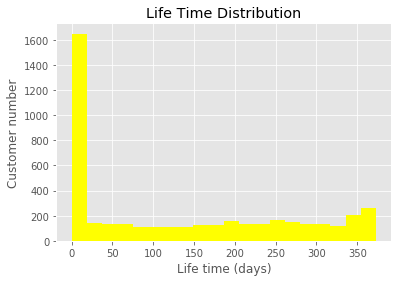

In [93]:
life_time['life_time'].hist(bins = 20, color = 'yellow')
plt.title('Life Time Distribution')
plt.ylabel('Customer number')
plt.xlabel('Life time (days)')
plt.show()

In [94]:
'''
Many customers only consumed once and then left, this website needs
to focus more on the improvement of customer's initial purchase
experience. We can build online mark system and do some phone
investigations to get feedback. Also, activities aim at attracting
second purchase should be considered, for instance: offer coupons
with time limitation.
'''

"\nMany customer only consumed once and then left, this website need\n to focus more on the improvement of customer's initial purchase\n experience. We can build online mark system and do some phone\n investigation to get feedback. Also, activities aim to attract\n second purchase should be considered, for instance: offer coupons\n with time limitation.\n"

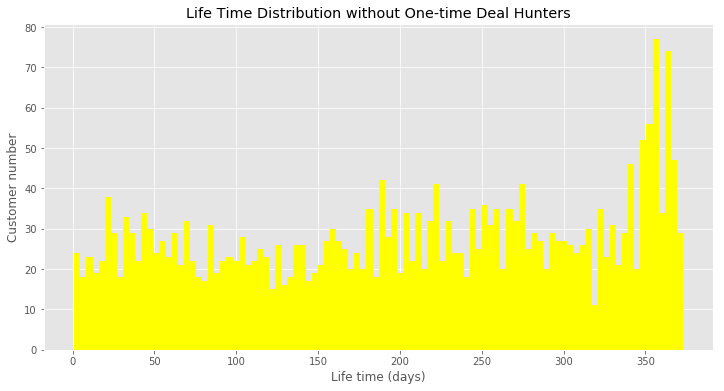

In [95]:
life_time[life_time['life_time'] > 0].life_time.hist(bins = 100, figsize = (12, 6), color = 'yellow')
plt.title('Life Time Distribution without One-time Deal Hunters')
plt.ylabel('Customer number')
plt.xlabel('Life time (days)')
plt.show()

In [96]:
'''
We filter the customer with life cycle 0 and plot remaining data
again, about 25% of clients had a life cycle length between 170~330
days, this group has a high-quality life cycle. And customers with 
life cycle longer than 330 days can be viewed as having good user 
stickness, we have a lot locateing in this period, which is a good sign.
'''

'\nWe filter the customer with life cycle 0 and plot remaining data\nagain, about 25% clients have a life cycle length between 170~330\ndays, this group has a high quality life cycle. And customers with \nlife cycle longer than 330 days can be viewd as having good user \nstickness, we have a lot located in this period, which is a good sign.\n'

In [97]:
bin=[0,75,170,330,400]
pd.cut(life_time[life_time['life_time']>0]['life_time'],bins=bin).value_counts()

(170, 330]    1198
(75, 170]      577
(0, 75]        517
(330, 400]     498
Name: life_time, dtype: int64

In [98]:
#mean purchase period for customer brought more than once
life_time[life_time['life_time'] > 0].life_time.mean()

203.32867383512544

In [99]:
'''
The average lifecycle for customer with more than twice purchase
is 203,far higher than the total mean life cycle length 103. 
This company should put more effort into maintaining new customers.
'''

'\nThe average lifecycle for customer with more than twice purchase\nis 203,far higher than the total mean life cycle length 103. \nThis company should put more effort in maintaining new customers.\n'

In [100]:
'''
'Customer life cycle' is the time difference between the 
first and last purchase. However, 'Customer retention period' 
focus on customers' periodic behaviors. Due to the dataset incompleteness we 
mentioned before, the outcome has limitations here as well.
'''

'\nCustomer retention situation is the time difference between the \nfirst and last purchase, due to the dataset incompleteness we \nmentioned before, the outcome has limitations here.\n'

In [101]:
#Customer retention condition
sales_customer.head()
mindate_1=mindate.copy().reset_index()
customer_retention=sales_customer.merge(mindate_1,on='CustomerID',how='inner',suffixes=('','Min'))
customer_retention.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice,DateMin
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,12,22.00,2010-12-01
1,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,12,20.34,2010-12-01
2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,12,20.34,2010-12-01
3,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,2010-12-01,12,15.30,2010-12-01
4,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,2010-12-01,12,25.50,2010-12-01


In [102]:
customer_retention['DateDiff']=(customer_retention.Date-customer_retention.DateMin).dt.days
date_bins=[0,3,7,30,60,90,100]
customer_retention['DateDiffBin']=pd.cut(customer_retention['DateDiff'],bins=date_bins)
customer_retention[customer_retention['DateDiffBin'].isnull().values==False].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice,DateMin,DateDiff,DateDiffBin
82,536600,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-02 08:32:00,2.55,17850,United Kingdom,2010-12-02,12,15.30,2010-12-01,1,"(0, 3]"
83,536600,71053,WHITE METAL LANTERN,6,2010-12-02 08:32:00,3.39,17850,United Kingdom,2010-12-02,12,20.34,2010-12-01,1,"(0, 3]"
84,536600,82483,WOOD 2 DRAWER CABINET WHITE FINISH,4,2010-12-02 08:32:00,4.95,17850,United Kingdom,2010-12-02,12,19.80,2010-12-01,1,"(0, 3]"
85,536600,82486,WOOD S/3 CABINET ANT WHITE FINISH,2,2010-12-02 08:32:00,6.95,17850,United Kingdom,2010-12-02,12,13.90,2010-12-01,1,"(0, 3]"
86,536600,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-02 08:32:00,2.10,17850,United Kingdom,2010-12-02,12,12.60,2010-12-01,1,"(0, 3]"


In [103]:
customer_retention['DateDiffBin'].value_counts()

(30, 60]     28252
(60, 90]     25876
(7, 30]      17148
(90, 100]     9275
(3, 7]        3559
(0, 3]        1311
Name: DateDiffBin, dtype: int64

In [104]:
'''
For customers with only one consumption, the rentention period
is 0, and we don't count them in this part.
'''

"\nFor customers with only one consumption, the rentention period\nis 0, and we don't count them in this part.\n"

In [105]:
customer_retention.DateMin.describe()

count                  392690
unique                    305
top       2010-12-01 00:00:00
freq                    35423
first     2010-12-01 00:00:00
last      2011-12-09 00:00:00
Name: DateMin, dtype: object

In [106]:
#use pivot table to see each customer consumed 
#how much money in which period 
retention_pivot = customer_retention.pivot_table(index = ['CustomerID'], columns = ['DateDiffBin'], values = ['SumPrice'], aggfunc= np.sum)
retention_pivot.head(100)

SumPrice                                              
DateDiffBin   (0, 3]   (3, 7]  (7, 30] (30, 60] (60, 90] (90, 100]
CustomerID                                                        
12346            NaN      NaN      NaN      NaN      NaN       NaN
12347            NaN      NaN      NaN   475.39      NaN       NaN
12348            NaN      NaN      NaN   227.44      NaN       NaN
12349            NaN      NaN      NaN      NaN      NaN       NaN
12350            NaN      NaN      NaN      NaN      NaN       NaN
12352            NaN      NaN  1104.98   160.33      NaN       NaN
12353            NaN      NaN      NaN      NaN      NaN       NaN
12354            NaN      NaN      NaN      NaN      NaN       NaN
12355            NaN      NaN      NaN      NaN      NaN       NaN
12356            NaN      NaN      NaN      NaN   481.46       NaN
12357            NaN      NaN      NaN      NaN      NaN       NaN
12358            NaN      NaN      NaN      NaN      NaN       NaN
12359            NaN      NaN  1838.91      NaN      NaN       NaN
12360            NaN      NaN      NaN      NaN   534.70       NaN
12361            NaN      NaN      NaN      NaN      NaN       NaN
12362            NaN      NaN      NaN      NaN   495.24       NaN
12363            NaN      NaN      NaN      NaN      NaN       NaN
12364            NaN      NaN      NaN    79.80   299.06       NaN
12365            NaN      NaN      NaN      NaN      NaN       NaN
12367            NaN      NaN      NaN      NaN      NaN       NaN
12370          277.2      NaN      NaN      NaN   938.39       NaN
12371            NaN      NaN   360.00      NaN      NaN       NaN
12372            NaN      NaN      NaN      NaN   515.70       NaN
12373            NaN      NaN      NaN      NaN      NaN       NaN
12374            NaN      NaN      NaN      NaN      NaN       NaN
12375            NaN      NaN      NaN      NaN   227.20       NaN
12377            NaN      NaN      NaN   626.60      NaN       NaN
12378            NaN      NaN      NaN      NaN      NaN       NaN
12379            NaN      NaN      NaN      NaN   392.40       NaN
12380            NaN      NaN      NaN      NaN      NaN       NaN
...              ...      ...      ...      ...      ...       ...
12432          700.0      NaN      NaN      NaN      NaN       NaN
12433            NaN  1867.98      NaN      NaN      NaN       NaN
12434            NaN      NaN      NaN      NaN      NaN       NaN
12435            NaN      NaN      NaN      NaN      NaN       NaN
12436            NaN      NaN      NaN      NaN      NaN       NaN
12437            NaN      NaN   150.50   439.76   147.71       NaN
12438            NaN      NaN      NaN      NaN      NaN       NaN
12441            NaN      NaN      NaN      NaN      NaN       NaN
12442            NaN      NaN      NaN      NaN      NaN       NaN
12444            NaN      NaN      NaN   757.07   562.54       NaN
12445            NaN      NaN      NaN      NaN      NaN       NaN
12446            NaN      NaN      NaN      NaN      NaN       NaN
12447            NaN      NaN      NaN      NaN      NaN       NaN
12448            NaN      NaN      NaN      NaN      NaN       NaN
12449            NaN      NaN      NaN   777.95      NaN    1087.7
12450            NaN      NaN    96.00      NaN      NaN       NaN
12451            NaN      NaN      NaN      NaN      NaN       NaN
12452            NaN      NaN      NaN      NaN      NaN       NaN
12453            NaN      NaN      NaN      NaN      NaN       NaN
12454            NaN      NaN      NaN      NaN      NaN       NaN
12455           15.0      NaN      NaN      NaN      NaN       NaN
12456            NaN      NaN      NaN      NaN      NaN       NaN
12457          219.0   179.00      NaN      NaN      NaN       NaN
12458            NaN      NaN      NaN      NaN      NaN       NaN
12461            NaN      NaN      NaN   200.00      NaN       NaN
12462            NaN      NaN      NaN      NaN      NaN   

In [107]:
retention_pivot.mean()

          DateDiffBin
SumPrice  (0, 3]         587.662911
          (3, 7]         366.199325
          (7, 30]        519.275532
          (30, 60]       595.992305
          (60, 90]       593.322921
          (90, 100]      632.466067
dtype: float64

In [108]:
#0-1 convert
retention_pivot_trans=retention_pivot.fillna(0).applymap(lambda x:1 if x > 0 else 0)
retention_pivot_trans.head()

SumPrice                                           
DateDiffBin   (0, 3] (3, 7] (7, 30] (30, 60] (60, 90] (90, 100]
CustomerID                                                     
12346              0      0       0        0        0         0
12347              0      0       0        1        0         0
12348              0      0       0        1        0         0
12349              0      0       0        0        0         0
12350              0      0       0        0        0         0

In [109]:
retention_pivot_trans.sum()/ retention_pivot_trans.count()

          DateDiffBin
SumPrice  (0, 3]         0.018211
          (3, 7]         0.037575
          (7, 30]        0.153757
          (30, 60]       0.230060
          (60, 90]       0.212310
          (90, 100]      0.082065
dtype: float64

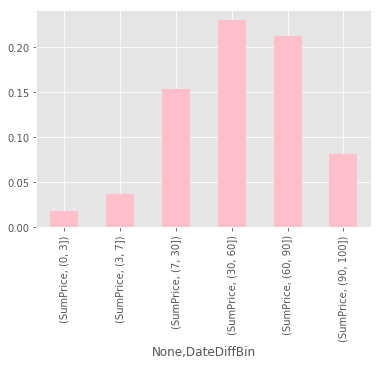

In [110]:
(retention_pivot_trans.sum()/ retention_pivot_trans.count()).plot.bar(color = 'pink')
plt.show()

In [111]:
'''
Customers came back in
0~3 days:3.2%
4~7 days:6.6%
the second month:37.4%
the third month:40.5%
90~180 days:67%
The high loyalty customers might not consumption frequently
but theirs user stickness were pretty good.
'''

'\nCustomers came back in\n0~3 days:3.2%\n4~7 days:6.6%\nthe secone month:37.4%\nthe third month:40.5%\n90~180 days:67%\nThe high loyalty customers may not consumption frequently\nbut user stickness are pretty good.\n'

In [112]:
#Purchase period

#We calculate the difference between two adjacent purchase.
sales_cycle=customer_retention.drop_duplicates(subset=['CustomerID','Date'],keep='first')
sales_cycle.sort_values(by='Date',ascending=True)
def diff(group):
    d=group.DateDiff-group.DateDiff.shift()
    return d
last_diff=sales_cycle.groupby('CustomerID').apply(diff)
last_diff.head(10)

CustomerID        
12346       193892     NaN
12347       93544      NaN
            93575     50.0
            93604     71.0
            93628     63.0
            93646     54.0
            93668     90.0
            93715     37.0
12348       156818     NaN
            156835    40.0
Name: DateDiff, dtype: float64

In [113]:
last_diff.describe()

count    12425.000000
mean        45.656901
std         53.067262
min          1.000000
25%         12.000000
50%         28.000000
75%         58.000000
max        366.000000
Name: DateDiff, dtype: float64

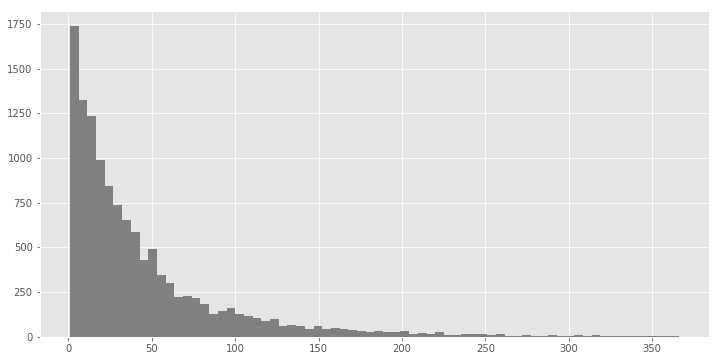

In [114]:
last_diff.hist(bins = 70,figsize = (12, 6), color = 'grey')
plt.show()

In [115]:
'''
The purchase period for all orders shows a long-tail distribution
most intervals were not long.
'''

'\nThe purchase period for all orders shows a long-tail distribution\nmost of the intervals are not long.\n'

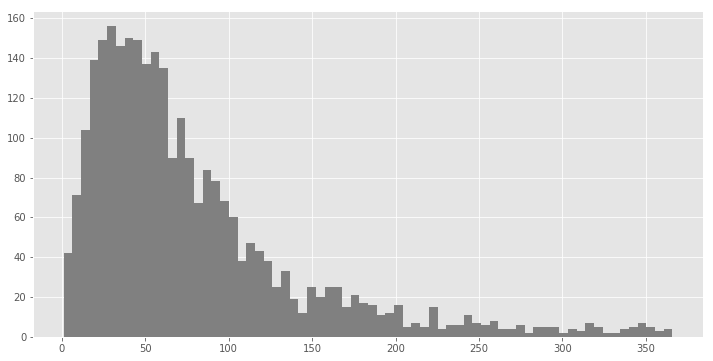

In [116]:
last_diff_customer = last_diff.groupby('CustomerID').mean()
last_diff_customer.mean()
last_diff_customer.hist(bins = 70,figsize = (12, 6), color = 'grey')
plt.show()

In [117]:
'''
Group the data by 'CustomerID' again. This is a right-skewed 
distribution with the peak value around 15~70 days, indicating 
most customers concentrated there. We suggest this company send 
pomotion information to customers on a monthly basis.
'''

'\nGroup the data by CustomerID, it is a possitively skewed\ndistribution, the peak value is between 15~70 days.The company\ncan push some promotion information to customers on weekly basis.\n'